In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.inspection import permutation_importance


# EDA and Data Pre-proccesing

In [2]:
data = pd.read_csv("D:\\Resume_and_finshed_projects\\spotify\\spotify_2023.csv", encoding = "ISO-8859-1") 
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:

#Overveiw of the data
print(data.info())
print('====================================================')
print(data.shape)
print('====================================================')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
data.isnull().sum() 


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
#Converting keys to numerical values 
key_mapping = {
    'C': 0,
    'C#': 1,
    'D': 2,
    'D#': 3,
    'E': 4,
    'F': 5,
    'F#': 6,
    'G': 7,
    'G#': 8,
    'A': 9,
    'A#': 10,
    'B': 11
}
data['key'] = data['key'].map(key_mapping) 

In [6]:
#Creating a subset with the missing values gone 


data_subset = data.dropna()
data_subset.isnull().sum() 


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [7]:
#Converting modes to numerical values so can be used in machine learning algorythims  

data_subset.loc[:,'mode'] = data_subset['mode'].replace({'Major': 1, 'Minor': 0})  





In [8]:
#making it so its just top 100 

data_100 = data_subset[data_subset['in_spotify_charts'] <= 100].copy()  
#Combining dates into one column 
data_100['release_date'] = pd.to_datetime(data_100['released_year'].astype(str) + '.' +
                                      data_100['released_month'].astype(str) + '.' +
                                      data_100['released_day'].astype(str),errors='coerce')

data_100 = data_100.drop(columns = ['in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts','released_year','released_month','released_day'])

data_100.info()  



<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 1 to 952
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            814 non-null    object        
 1   artist(s)_name        814 non-null    object        
 2   artist_count          814 non-null    int64         
 3   in_spotify_playlists  814 non-null    int64         
 4   in_spotify_charts     814 non-null    int64         
 5   streams               814 non-null    object        
 6   bpm                   814 non-null    int64         
 7   key                   814 non-null    float64       
 8   mode                  814 non-null    object        
 9   danceability_%        814 non-null    int64         
 10  valence_%             814 non-null    int64         
 11  energy_%              814 non-null    int64         
 12  acousticness_%        814 non-null    int64         
 13  instrumentalness_%    814

In [9]:
#Changing Streams Data Type  
data_100['streams'] = pd.to_numeric(data_100['streams'], errors='coerce') 
data_100.info()


<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 1 to 952
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            814 non-null    object        
 1   artist(s)_name        814 non-null    object        
 2   artist_count          814 non-null    int64         
 3   in_spotify_playlists  814 non-null    int64         
 4   in_spotify_charts     814 non-null    int64         
 5   streams               813 non-null    float64       
 6   bpm                   814 non-null    int64         
 7   key                   814 non-null    float64       
 8   mode                  814 non-null    object        
 9   danceability_%        814 non-null    int64         
 10  valence_%             814 non-null    int64         
 11  energy_%              814 non-null    int64         
 12  acousticness_%        814 non-null    int64         
 13  instrumentalness_%    814

In [10]:
#Adding column to rank by streams and in_spotify_playlists
data_100 = data_100.sort_values(by = 'in_spotify_playlists', ascending= False, ignore_index= True).reset_index()
data_100 = data_100.sort_values(by= 'streams', ascending= False, ignore_index= True).reset_index() 

data_100.columns.values[0] = 'Rank_By_Streams'   
data_100.columns.values[1] = 'Ranked_by_in_spotify_playlists'
#This song has no values for Streams
data_100 = data_100[data_100['track_name'] != 'Love Grows (Where My Rosemary Goes)']

data_100.head()

,Rank_By_Streams,Ranked_by_in_spotify_playlists,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,0,17,Shape of You,Ed Sheeran,1,32181,10,3.562544e+09,96,1.0,0,83,93,65,58,0,9,8,2017-01-06
1,1,32,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2.808097e+09,90,2.0,1,76,91,50,54,0,7,5,2018-10-09
2,2,5,One Dance,"Drake, WizKid, Kyla",3,43257,24,2.713922e+09,104,1.0,1,77,36,63,1,0,36,5,2016-04-04
3,3,60,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,17050,36,2.665344e+09,170,1.0,1,59,48,76,4,0,10,5,2021-07-09
4,4,52,Believer,Imagine Dragons,1,18986,23,2.594040e+09,125,10.0,0,77,74,78,4,0,23,11,2017-01-31


In [11]:
data_100.describe()

,Rank_By_Streams,Ranked_by_in_spotify_playlists,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,813.000000,813.000000,813.000000,813.000000,813.000000,8.130000e+02,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813
mean,406.000000,406.608856,1.569496,4864.147601,11.335793,4.702135e+08,122.574416,5.858549,67.414514,51.116851,64.322263,26.369004,1.685117,18.148831,10.555966,2018-12-14 12:38:04.870848512
min,0.000000,0.000000,1.000000,31.000000,0.000000,2.762000e+03,65.000000,1.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,203.000000,203.000000,1.000000,829.000000,0.000000,1.342945e+08,99.000000,3.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,2021-01-15 00:00:00
50%,406.000000,407.000000,1.000000,2040.000000,3.000000,2.647175e+08,120.000000,6.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,2022-05-03 00:00:00
75%,609.000000,610.000000,2.000000,4893.000000,16.000000,6.018638e+08,142.000000,8.000000,79.000000,70.000000,76.000000,41.000000,0.000000,23.000000,12.000000,2022-11-30 00:00:00
max,812.000000,813.000000,8.000000,52898.000000,100.000000,3.562544e+09,206.000000,11.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,234.837178,235.250065,0.877555,7757.161140,17.407508,5.237003e+08,28.231903,3.238229,14.697999,23.598653,16.111892,25.507685,8.788104,13.553079,10.236050,NaN


In [12]:
#Song in least playlists and song in most
most_and_least_playlist = data_100[(data_100['in_spotify_playlists'] == data_100['in_spotify_playlists'].min()) | (data_100['in_spotify_playlists'] == data_100['in_spotify_playlists'].max())]
most_and_least_playlist

,Rank_By_Streams,Ranked_by_in_spotify_playlists,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
115,115,0,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,52898,0,933815613.0,116,6.0,0,79,87,81,4,0,10,4,2013-01-01
795,795,813,Still With You,Jung Kook,1,31,39,38411956.0,88,1.0,0,53,34,47,9,0,83,4,2020-06-05


In [13]:
#Song with most streams and song with least 
most_and_least_streamed = data_100[(data_100['streams'] == data_100['streams'].min()) | (data_100['streams'] == data_100['streams'].max())] 

most_and_least_streamed

,Rank_By_Streams,Ranked_by_in_spotify_playlists,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,0,17,Shape of You,Ed Sheeran,1,32181,10,3.562544e+09,96,1.0,0,83,93,65,58,0,9,8,2017-01-06
812,812,635,Que Vuelvas,"Carin Leon, Grupo Frontera",2,763,26,2.762000e+03,162,10.0,1,49,78,64,19,0,11,4,2022-12-09


In [14]:
#Oldest Song 
data_100[data_100['release_date'] == data_100['release_date'].min()] 
#Nothing confirming this date other sources have different year 

,Rank_By_Streams,Ranked_by_in_spotify_playlists,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
691,691,752,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",3,323,0,90598517.0,130,6.0,0,65,49,80,22,4,7,5,1930-01-01


In [15]:
#Most Streamed Artists 
most_streamed = data_100.groupby('artist(s)_name')[['streams']].sum().nlargest(20,'streams') 
most_streamed

,streams
artist(s)_name,
Taylor Swift,1.185115e+10
Ed Sheeran,1.105125e+10
Bad Bunny,8.582384e+09
Eminem,6.183806e+09
The Weeknd,6.038641e+09
Harry Styles,6.033491e+09
Imagine Dragons,5.272485e+09
Adele,4.508747e+09
SZA,4.197341e+09


In [16]:
#Putting outputs in Excel files so can be used in presentation


with pd.ExcelWriter('EDA_stuff.xlsx') as writer: 
    most_and_least_streamed.to_excel(writer, sheet_name='most_and_least_streamed.xlsx') 
    most_and_least_playlist.to_excel(writer, sheet_name='most_and_least_playlist.xlsx')
    most_streamed.to_excel(writer, sheet_name='most_streamed.xlsx')

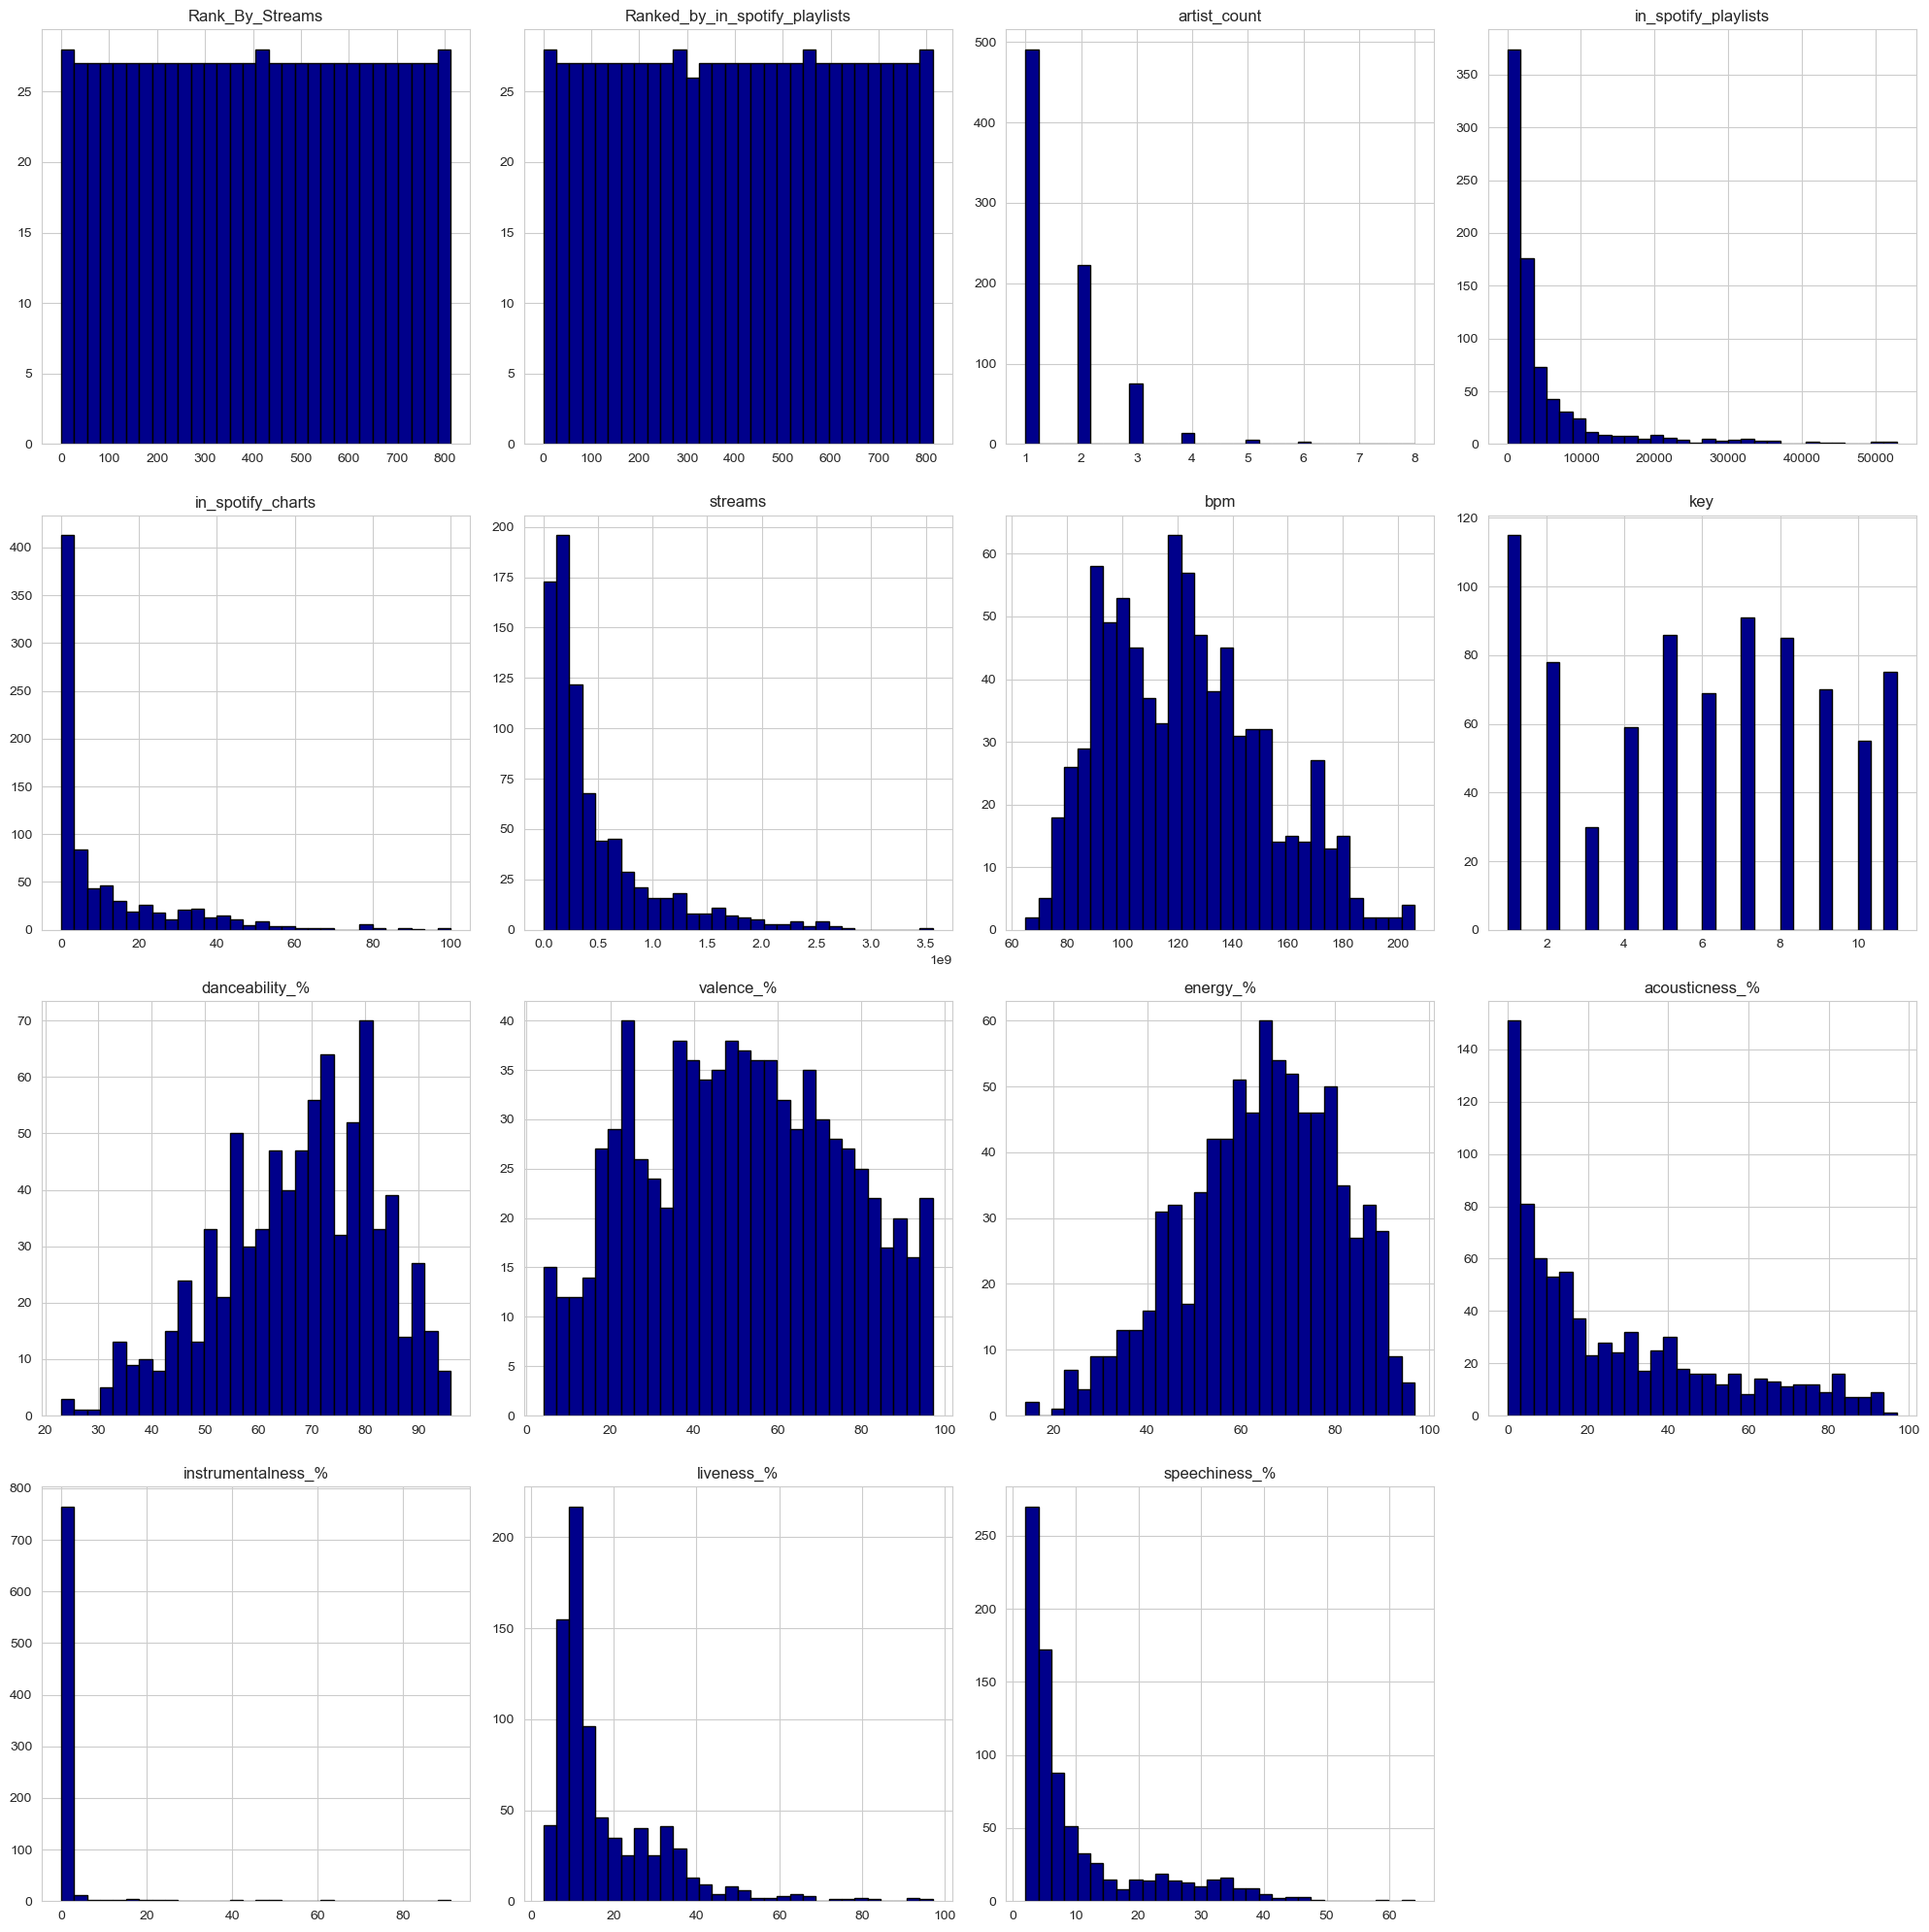

In [17]:
#Distrubiton of Values
sns.set_style('whitegrid') 

data_100.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='darkblue', edgecolor='black')
plt.tight_layout()
plt.show()


# Machine Learning Algorithms for in_spotify_charts

In [18]:
#Splitting up data to be trained to see if there is any trends that makes a song top 100  
target = 'in_spotify_charts'
features = ['bpm', 'key', 'mode']

y = data_100[target]
X = data_100[features]  
#One hot encoding keys


#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)  

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




((569, 3), (244, 3), (569,), (244,))

In [19]:
mse_list = []
r2_list = [] 
r2_adjusted = [] 
means = []

#Looping Through Key BPm and Mode seperatily
for feature in features:
    
    X_feature = data_100[[feature]] 
    print(feature)
    
 
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.3, random_state=13)
    
    
    model_feature = LinearRegression()
    model_feature.fit(X_train_feature, y_train_feature)
    
   
    y_pred_feature = model_feature.predict(X_test_feature)
    
   
    mse_feature = mean_squared_error(y_test_feature, y_pred_feature)
    r2_feature = r2_score(y_test_feature, y_pred_feature) 
    adjusted_r2 = 1 - (1 - r2_feature)*(len(y) -1)/(len(y) - X_feature.shape[1] -1 -1)
    
    mean = np.mean(X_feature) 
    means.append(mean)

    # Append results to lists
    mse_list.append(mse_feature)
    r2_list.append(r2_feature) 
    r2_adjusted.append(adjusted_r2)


results_linear_regresion_for_key_bpm_mode_seperatly = pd.DataFrame({
    'Feature': features,
    'MSE': mse_list,
    'R2 Score': r2_list, 
    'Adjusted R2 Score': r2_adjusted, 
    'Means': means
})
results_linear_regresion_for_key_bpm_mode_seperatly 


bpm
key
mode


,Feature,MSE,R2 Score,Adjusted R2 Score,Means
0,bpm,348.826317,-0.016117,-0.018626,122.574416
1,key,344.955953,-0.004843,-0.007324,5.858549
2,mode,349.262212,-0.017387,-0.019899,0.552276


Coefficient for bpm =  0.01848434364293397
Coefficient for key =  -0.2292625551159052
Coefficient for mode =  -1.2564962762031637


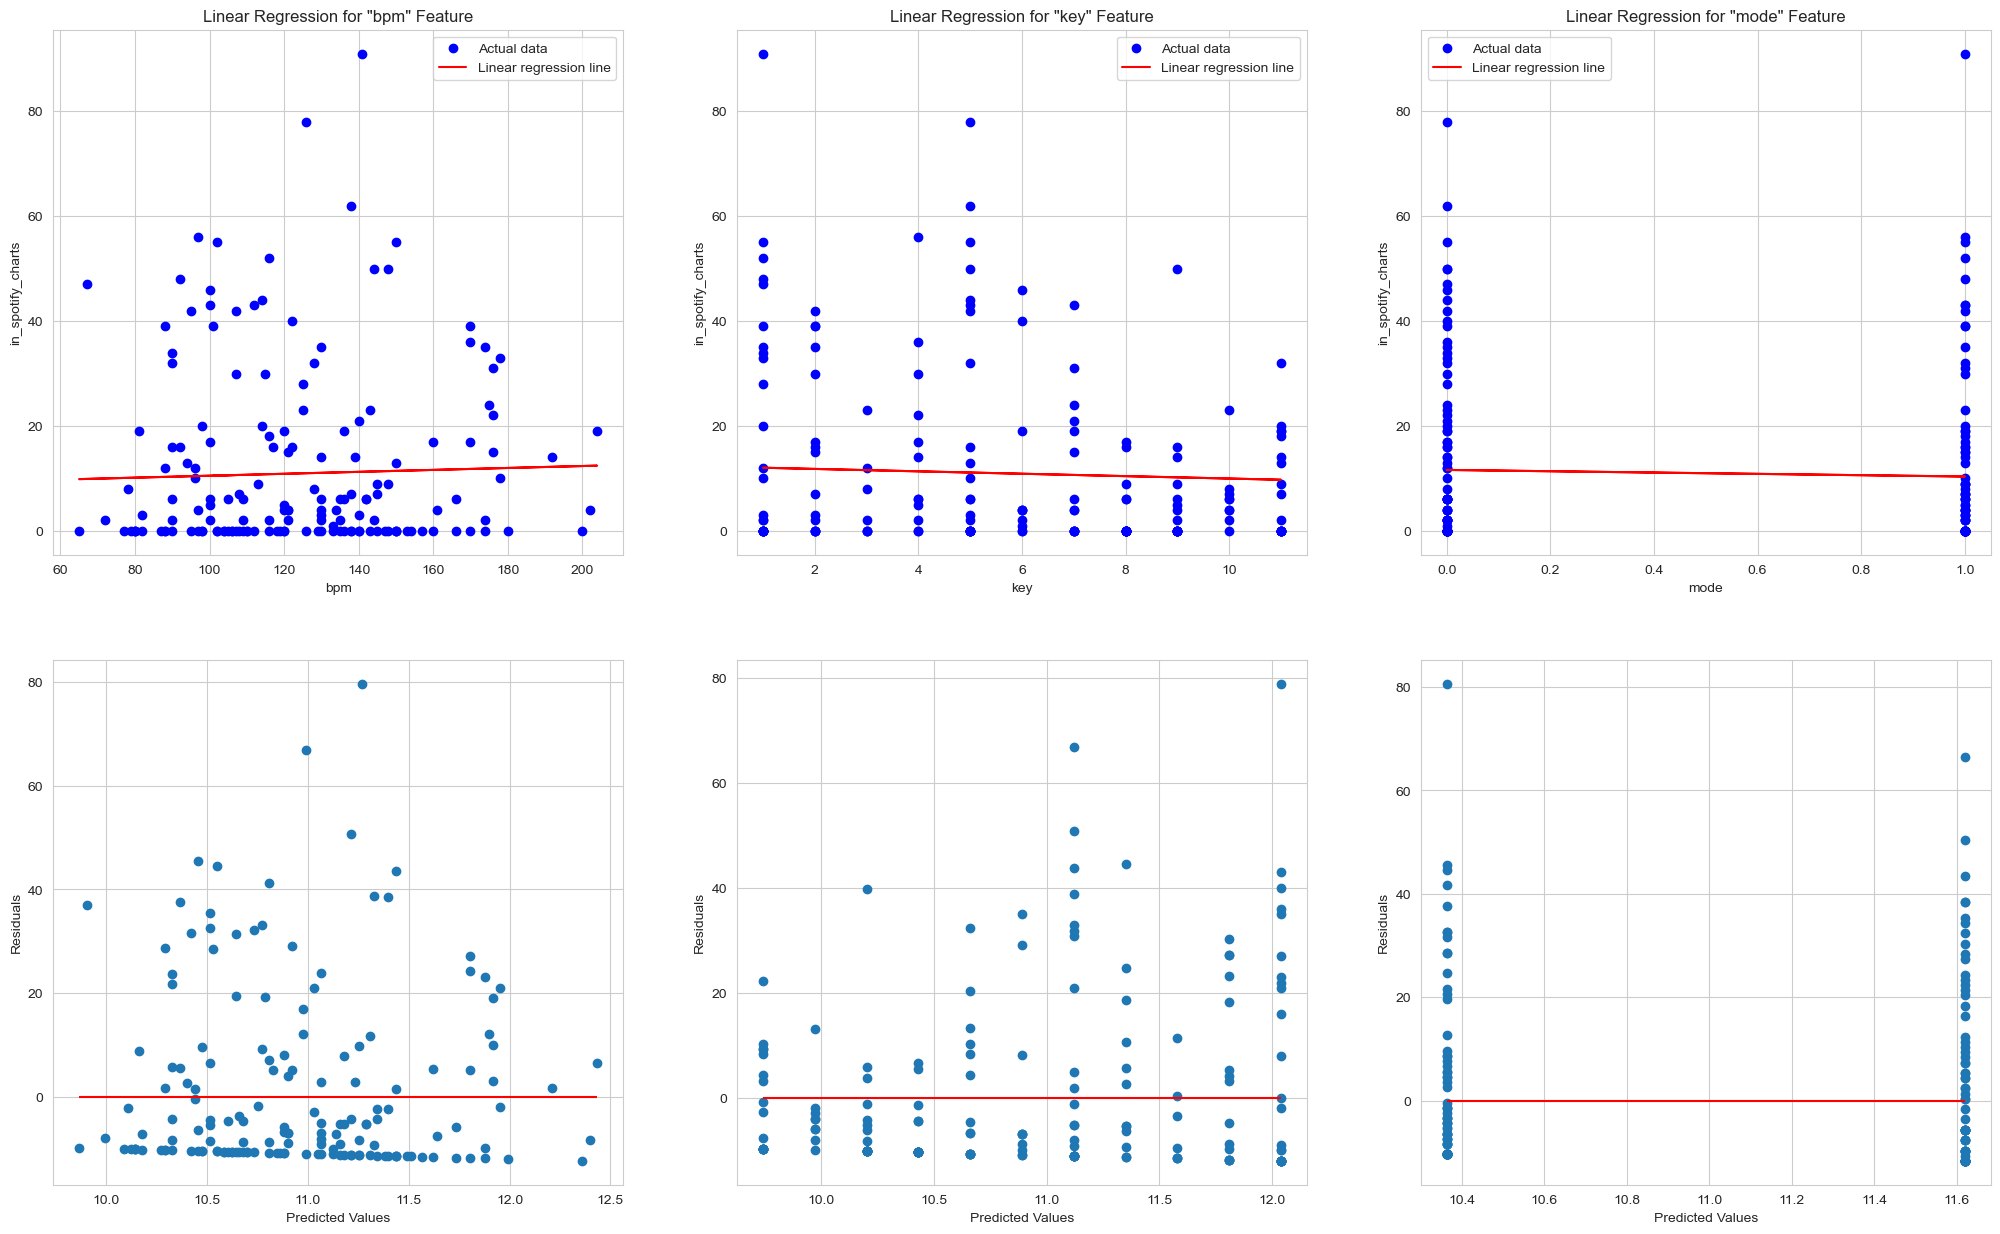

In [20]:
#Plots and Residuals for Key BPm and Mode
fig, axes = plt.subplots(2, 3, figsize=(25, 15 )) 
for i, column in enumerate(features): 
    #Features 
    X_feature = data_100[[column]] 

    #Data Split 
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.2, random_state=13) 

    #Train Linear Regression 
    model_feature = LinearRegression() 
    model_feature.fit(X_train_feature, y_train_feature)  

        # Predict the target variable for the testing data
    y_pred_feature = model_feature.predict(X_test_feature)
    
    # Linear regresion and data plots
    axes[0,i].scatter(X_test_feature, y_test_feature, color='blue', label='Actual data')
    axes[0,i].plot(X_test_feature, y_pred_feature, color='red', label='Linear regression line')
    axes[0,i].set_xlabel(column)
    axes[0,i].set_ylabel('in_spotify_charts')
    axes[0,i].set_title(f'Linear Regression for "{column}" Feature')
    axes[0,i].legend() 
    #Residual Plots 
    residuals = y_test_feature - y_pred_feature 
    axes[1,i].scatter(y_pred_feature,residuals) 
    axes[1, i].hlines(y=0, xmin=y_pred_feature.min(), xmax=y_pred_feature.max(), colors='red') 
    axes[1,i].set_xlabel('Predicted Values') 
    axes[1,i].set_ylabel('Residuals')  
    
    #Coeffiecnts 
    coefficient = model_feature.coef_[0] 

    print(f'Coefficient for {column} = ',coefficient) 
    print('==================================================')



In [21]:
#Finding min bpm and max bpm 
print(data_100['bpm'].min(), data_100['bpm'].max())

65 206


In [22]:
#Seperate Model to explore BPM more
X_bpm = data_100[['bpm']]
y = data_100['in_spotify_charts']  
X_train, X_test, y_train, y_test = train_test_split(X_bpm, y, test_size=0.3, random_state=13) 

model_bpm = LinearRegression() 
model_bpm.fit(X_train,y_train) 
y_pred = model_bpm.predict(X_test)  
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
coef = model_bpm.coef_
results_for_bpm = pd.DataFrame({
    'MSE': mse,
    'r2': r2,
    'coef': coef
})
print(results_for_bpm['coef'].max())
results_for_bpm



0.006152289375715018


,MSE,r2,coef
0,348.826317,-0.016117,0.006152


In [23]:
#Creating Ranges of BPM to test model on 

bpm_ranges = [(65,85),(85,105),(105,125),(125,145),(145,165),(165,185),(185,206)]
average_bpm = [(low + high) / 2 for low, high in bpm_ranges]
average_bpm_df = pd.DataFrame({'bpm': average_bpm}) 

predictions = model_bpm.predict(average_bpm_df) 


predictions_df = pd.DataFrame({
    'BPM Range': [f"{low}-{high}" for low, high in bpm_ranges],
    'Predicted Success': predictions, 
   
}) 
predictions_df.to_excel('BPm range predictions.xlsx')
predictions_df


,BPM Range,Predicted Success
0,65-85,10.310741
1,85-105,10.433787
2,105-125,10.556832
3,125-145,10.679878
4,145-165,10.802924
5,165-185,10.925970
6,185-206,11.052092


In [24]:
#Machine Learning Algorithms and importance for Key, Bpm and mode 

X_key_bpm_mode = data_100[features]  

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_key_bpm_mode, y, test_size=0.3, random_state=13) 



# Train the models on the full set of features
model_dt = DecisionTreeRegressor(random_state=13, max_depth=3)
model_rf = RandomForestRegressor(random_state=13, max_depth=3)
model_gb = GradientBoostingRegressor(random_state=13, max_depth=3)
model_lin = LinearRegression()

# Fit the models
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_lin.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_lin = model_lin.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Get feature importances
feature_importances_dt_non_eng_kbm = model_dt.feature_importances_
feature_importances_rf_non_eng_kbm = model_rf.feature_importances_
feature_importances_gb_non_eng_kbm= model_gb.feature_importances_
feature_importances_lin_non_eng_kbm = model_lin.coef_




In [25]:
# DataFrame for feature importances
feature_names = features


feature_importances_dict_non_eng_kbm = {
    'Feature': feature_names,
    'Importance (Decision Tree)': feature_importances_dt_non_eng_kbm,
    'Importance (Random Forest)': feature_importances_rf_non_eng_kbm,
    'Importance (Gradient Boosting)': feature_importances_gb_non_eng_kbm
}


coef_sum = sum(abs(feature_importances_lin_non_eng_kbm))
normalized_coefs = [abs(coef) / coef_sum for coef in feature_importances_lin_non_eng_kbm]
feature_importances_dict_non_eng_kbm['Importance (Linear Regression)'] = normalized_coefs

results_importances_non_eng_kbm = pd.DataFrame(feature_importances_dict_non_eng_kbm)


results_importances_non_eng_kbm

,Feature,Importance (Decision Tree),Importance (Random Forest),Importance (Gradient Boosting),Importance (Linear Regression)
0,bpm,0.839326,0.675831,0.602238,0.002971
1,key,0.160674,0.225068,0.319117,0.083250
2,mode,0.000000,0.099101,0.078644,0.913778


In [26]:
#Dataframe for Evalution of model
results_metrics_non_eng_keybpmmode = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'MSE': [mse_dt, mse_rf, mse_gb, mse_lin],
    'R2 Score': [r2_dt, r2_rf, r2_gb, r2_lin]
}) 
results_metrics_non_eng_keybpmmode

,Model,MSE,R2 Score
0,Decision Tree,362.408622,-0.055682
1,Random Forest,359.834835,-0.048185
2,Gradient Boosting,398.474087,-0.160739
3,Linear Regression,344.074906,-0.002276


In [27]:
#Seperate to train BPM

X_bpm = data_100[['bpm']]
y = data_100['in_spotify_charts']  

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_bpm, y, test_size=0.3, random_state=13) 



# Train the models
model_dt = DecisionTreeRegressor(random_state=13, max_depth=3)
model_rf = RandomForestRegressor(random_state=13, max_depth=3)
model_gb = GradientBoostingRegressor(random_state=13, max_depth=3)
model_lin = LinearRegression()

# Fit the models
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_lin.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_lin = model_lin.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Get feature importances
feature_importances_dt_non_eng_kbm = model_dt.feature_importances_
feature_importances_rf_non_eng_kbm = model_rf.feature_importances_
feature_importances_gb_non_eng_kbm= model_gb.feature_importances_
feature_importances_lin_non_eng_kbm = model_lin.coef_

In [28]:
#Testing the models for BPM for Decision Tree and Random Forest
bpm_ranges = [(65,85),(85,105),(105,125),(125,145),(145,165),(165,185),(185,206)]
average_bpm = [(low + high) / 2 for low, high in bpm_ranges]
average_bpm_df = pd.DataFrame({'bpm': average_bpm}) 

predictions_dt = model_dt.predict(average_bpm_df) 
predictions_rf = model_rf.predict(average_bpm_df) 


predictions_df_bpm = pd.DataFrame({
    'BPM Range': [f"{low}-{high}" for low, high in bpm_ranges],
    'Predicted Success Descion Tree': predictions_dt, 
    'Predicted Success Random Forest': predictions_rf 
   
}) 

predictions_df_bpm.to_excel('bpm_all machine learnign.xlsx') 
predictions_df_bpm

,BPM Range,Predicted Success Descion Tree,Predicted Success Random Forest
0,65-85,0.000000,3.414393
1,85-105,11.676471,11.013209
2,105-125,11.676471,10.544161
3,125-145,8.389831,9.350958
4,145-165,8.389831,8.549522
5,165-185,8.389831,8.132540
6,185-206,26.333333,28.517303


In [29]:
X_bpm[(X_bpm['bpm'] <= 85) & (X_bpm['bpm'] >= 65)].shape

(65, 1)

In [30]:
#Machine Learning Algorithms and importance for audio features


features_18_24 = ['danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']
X_18_24 = data_100[features_18_24]


# Split the full dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_18_24, y, test_size=0.3, random_state=13)

# Train the models on the full set of features
model_dt = DecisionTreeRegressor(random_state=13, max_depth=3)
model_rf = RandomForestRegressor(random_state=13, max_depth=3)
model_gb = GradientBoostingRegressor(random_state=13, max_depth=3)
model_lin = LinearRegression()

# Fit the models
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_lin.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_lin = model_lin.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Get feature importances
feature_importances_dt_non_eng = model_dt.feature_importances_
feature_importances_rf_non_eng = model_rf.feature_importances_
feature_importances_gb_non_eng= model_gb.feature_importances_
feature_importances_lin_non_eng = model_lin.coef_




In [31]:
# DataFrame for feature importances
feature_names = features_18_24 


feature_importances_dict_non_eng = {
    'Feature': feature_names,
    'Importance (Decision Tree)': feature_importances_dt_non_eng,
    'Importance (Random Forest)': feature_importances_rf_non_eng,
    'Importance (Gradient Boosting)': feature_importances_gb_non_eng
}


coef_sum = sum(abs(feature_importances_lin_non_eng))
normalized_coefs = [abs(coef) / coef_sum for coef in feature_importances_lin_non_eng]
feature_importances_dict_non_eng['Importance (Linear Regression)'] = normalized_coefs

results_importances_non_eng = pd.DataFrame(feature_importances_dict_non_eng)


results_importances_non_eng

,Feature,Importance (Decision Tree),Importance (Random Forest),Importance (Gradient Boosting),Importance (Linear Regression)
0,danceability_%,0.180841,0.116267,0.130410,0.129902
1,valence_%,0.000000,0.133734,0.191922,0.041804
2,energy_%,0.616722,0.403898,0.219467,0.195036
3,acousticness_%,0.013376,0.143167,0.149162,0.036735
4,instrumentalness_%,0.000000,0.027609,0.036820,0.169491
5,liveness_%,0.189061,0.081794,0.135098,0.152127
6,speechiness_%,0.000000,0.093530,0.137121,0.274904


In [32]:
results_metrics_non_eng = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'MSE': [mse_dt, mse_rf, mse_gb, mse_lin],
    'R2 Score': [r2_dt, r2_rf, r2_gb, r2_lin]
}) 
results_metrics_non_eng

,Model,MSE,R2 Score
0,Decision Tree,350.204493,-0.020132
1,Random Forest,348.766192,-0.015942
2,Gradient Boosting,363.502008,-0.058867
3,Linear Regression,349.359380,-0.017670


Coefficient for bpm =  0.01848434364293397
Coefficient for key =  -0.2292625551159052
Coefficient for mode =  -1.2564962762031637


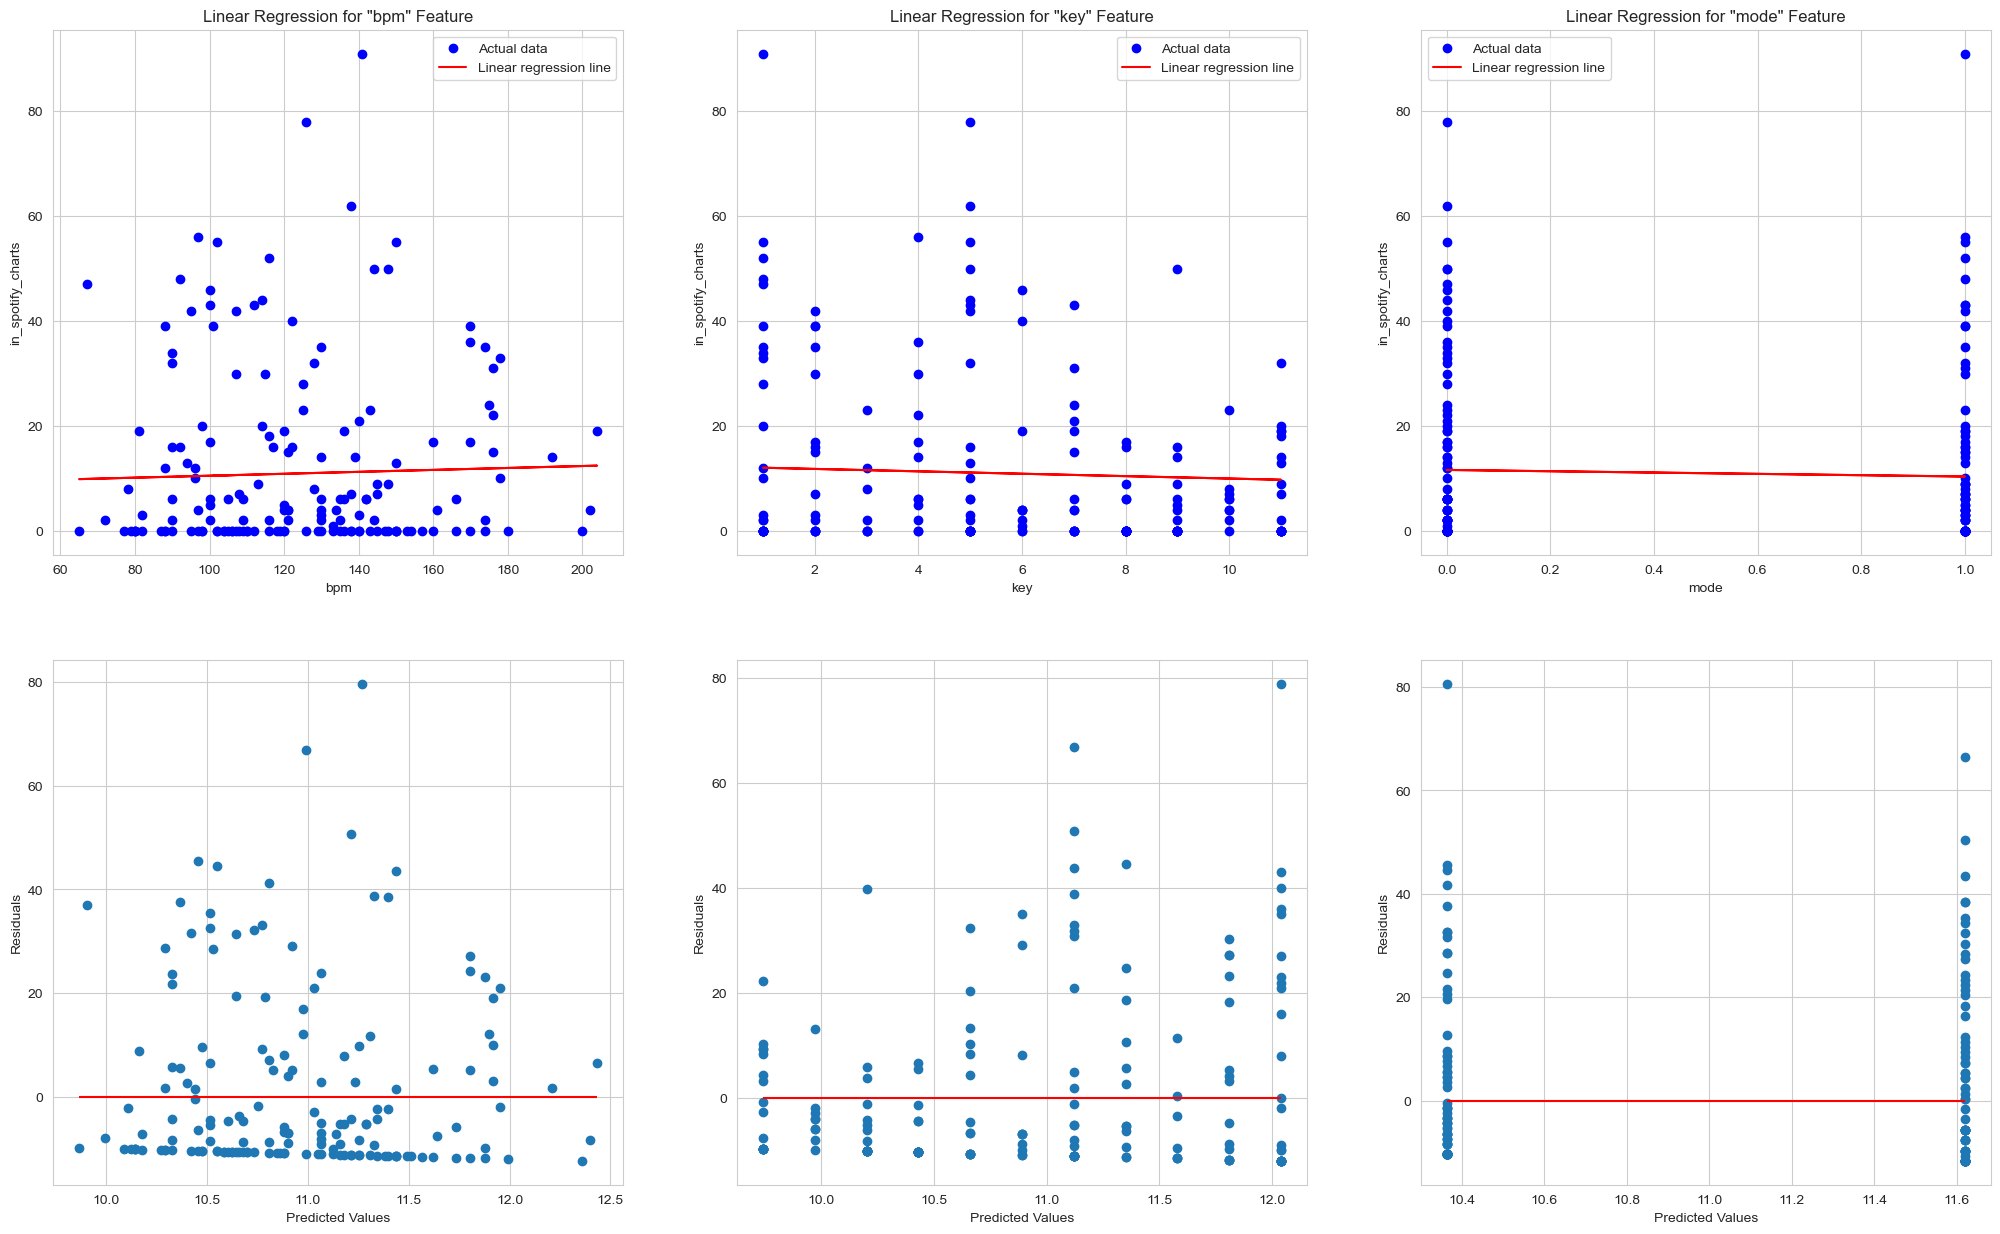

In [33]:
#Plots and Residuals for Key BPm and Mode
fig, axes = plt.subplots(2, 3, figsize=(25, 15 )) 
for i, column in enumerate(features): 
    #Features 
    X_feature = data_100[[column]] 

    #Data Split 
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.2, random_state=13) 

    #Train Linear Regression 
    model_feature = LinearRegression() 
    model_feature.fit(X_train_feature, y_train_feature)  

        # Predict the target variable for the testing data
    y_pred_feature = model_feature.predict(X_test_feature)
    
    # Linear regresion and data plots
    axes[0,i].scatter(X_test_feature, y_test_feature, color='blue', label='Actual data')
    axes[0,i].plot(X_test_feature, y_pred_feature, color='red', label='Linear regression line')
    axes[0,i].set_xlabel(column)
    axes[0,i].set_ylabel('in_spotify_charts')
    axes[0,i].set_title(f'Linear Regression for "{column}" Feature')
    axes[0,i].legend() 
    #Residual Plots 
    residuals = y_test_feature - y_pred_feature 
    axes[1,i].scatter(y_pred_feature,residuals) 
    axes[1, i].hlines(y=0, xmin=y_pred_feature.min(), xmax=y_pred_feature.max(), colors='red') 
    axes[1,i].set_xlabel('Predicted Values') 
    axes[1,i].set_ylabel('Residuals')  
    
    #Coeffiecnts 
    coefficient = model_feature.coef_[0] 

    print(f'Coefficient for {column} = ',coefficient) 
    print('==================================================')



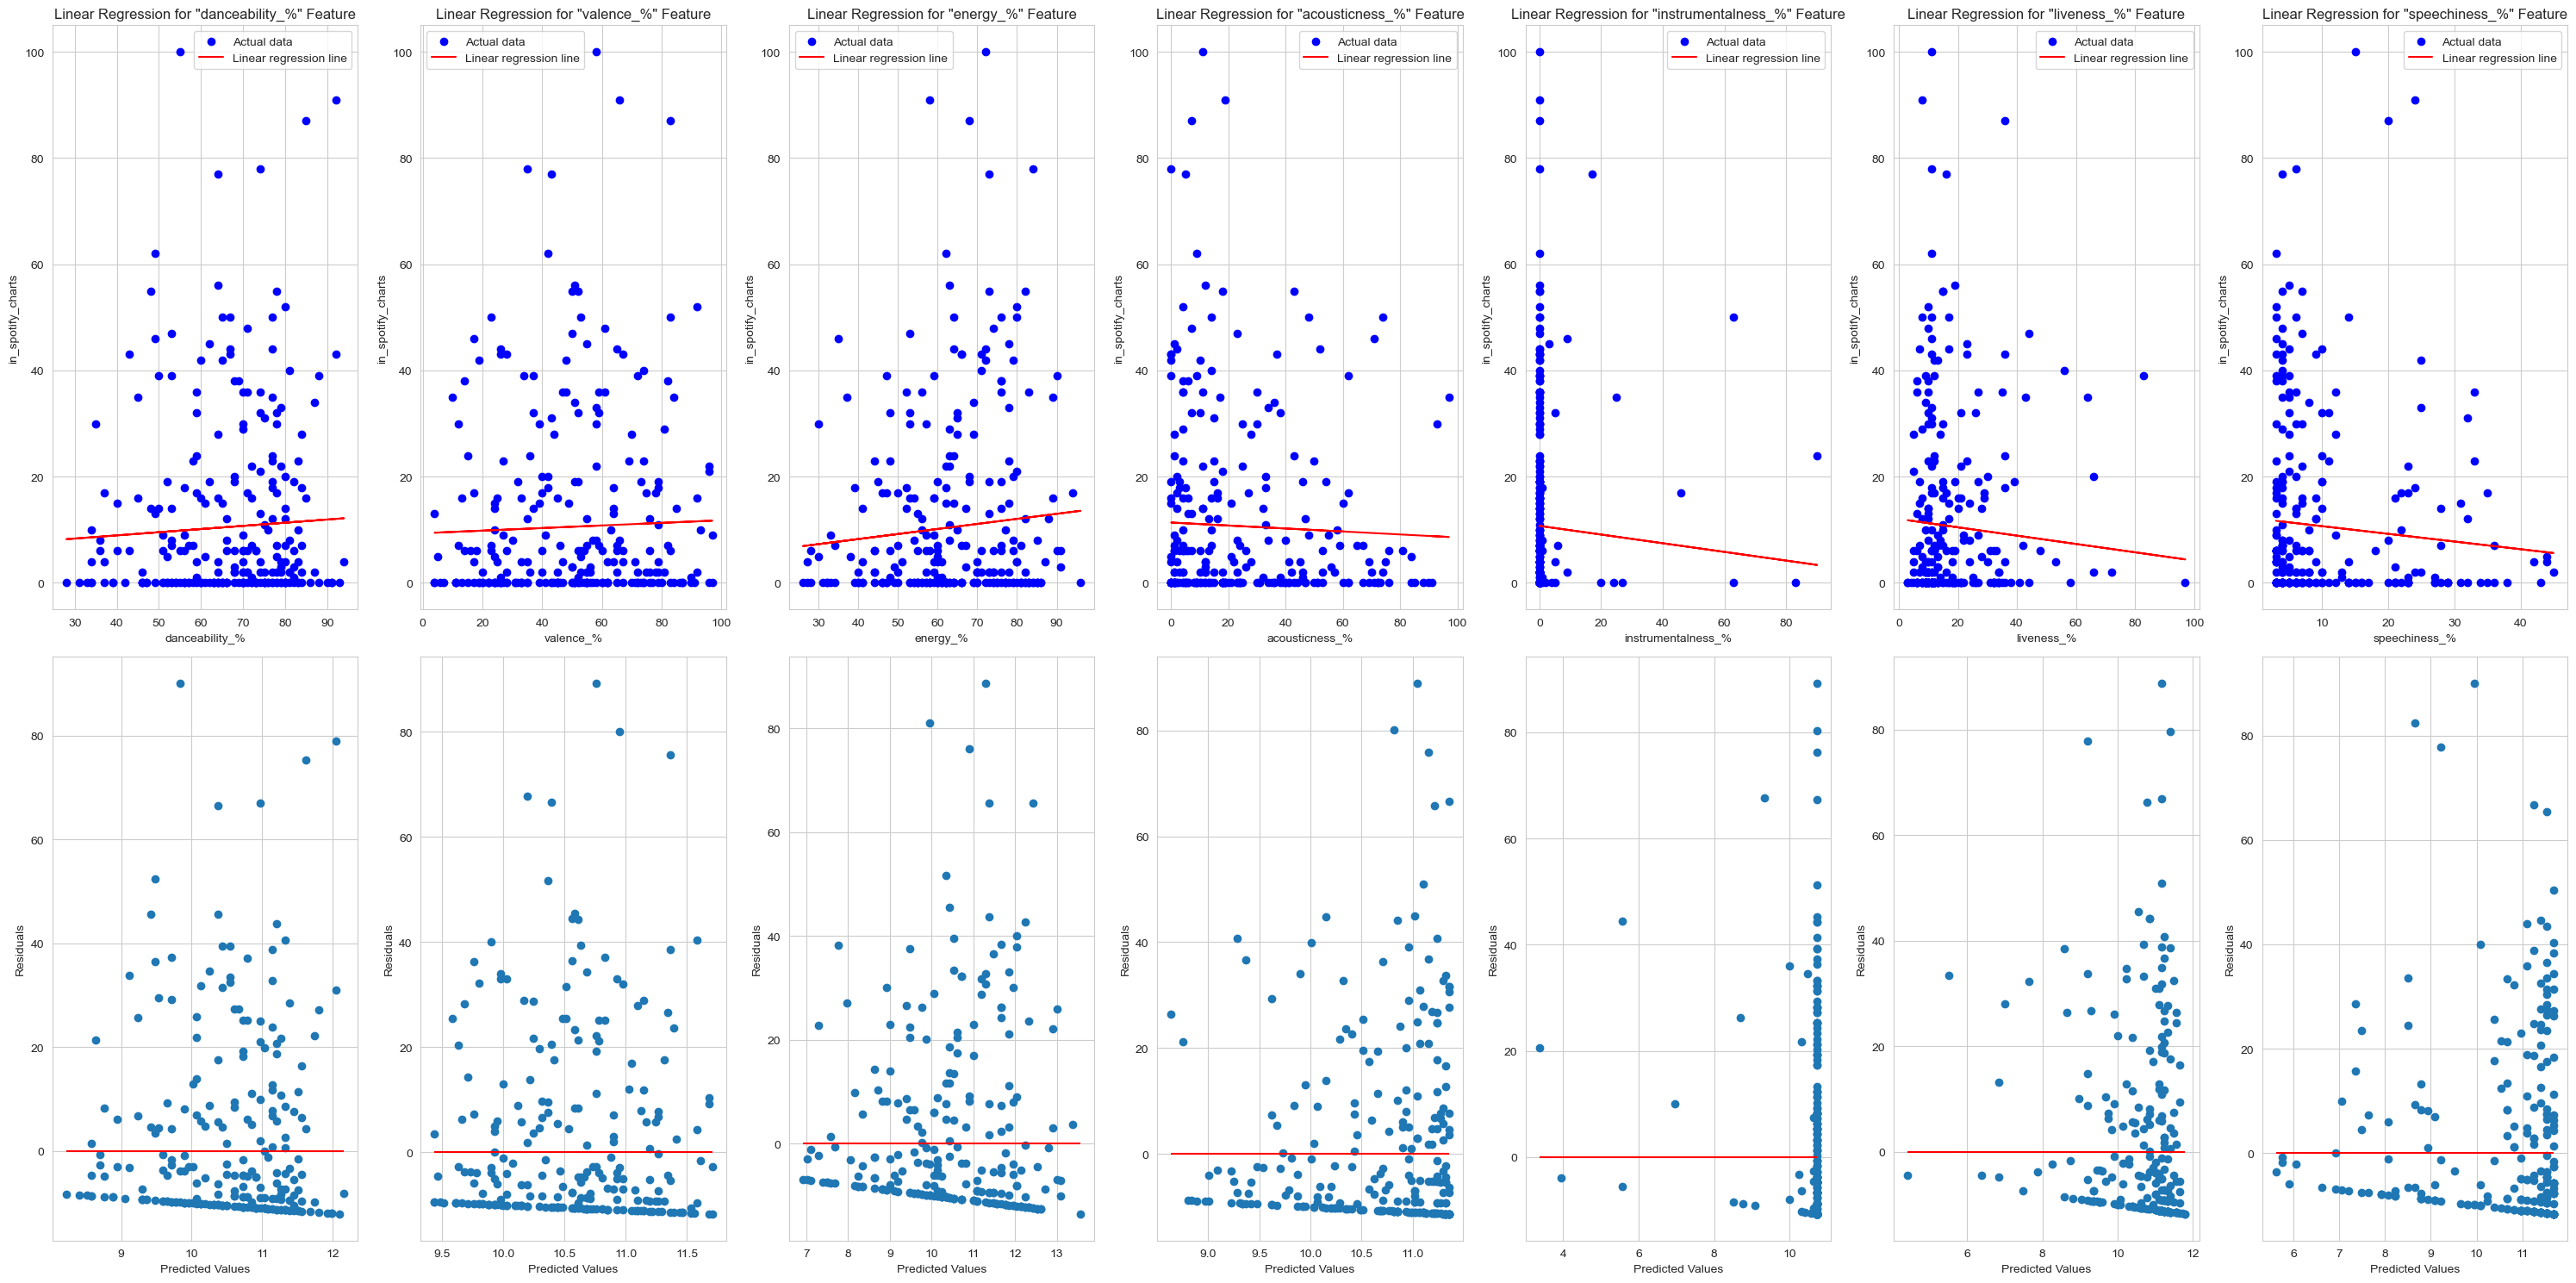

,Feature,Means,Coefficients
0,danceability_%,67.414514,0.059697
1,valence_%,51.116851,0.024333
2,energy_%,64.322263,0.095009
3,acousticness_%,26.369004,-0.028012
4,instrumentalness_%,1.685117,-0.081734
5,liveness_%,18.148831,-0.078481
6,speechiness_%,10.555966,-0.144387


In [34]:
#Plots for Columns 18-24 With seperate linear regression performed on each variable

fig, axes = plt.subplots(2, 7, figsize=(30, 15 ))
pred_results_non_eng = [] 
coef = [] 
means = [] 
percentage_importances = [(0,20),(20,40),(40,60),(60,80),(80,100)]
average_percentage = [(low + high)/2 for low, high in percentage_importances]  
mse_lin_sep = [] 
r2_lin_sep = []

# Loop through each column in columns 18 to 24
for i, column in enumerate(features_18_24):
    # Features
    X_feature = data_100[[column]] 
  
    
    # Data Split
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.3, random_state=13)
    
    # Train a linear regression model
    model_feature = LinearRegression()
    model_feature.fit(X_train_feature, y_train_feature) 
    
    
    # Predict the target variable for the testing data
    y_pred_feature = model_feature.predict(X_test_feature)
    
    for j, percentage in enumerate(average_percentage):
        average_percentage_df = pd.DataFrame({column: [percentage]})
        prediction = model_feature.predict(average_percentage_df)
        pred_results_non_eng.append({
        'Feature': column,
        'Percentage Range': f"{percentage_importances[j][0]}-{percentage_importances[j][1]}",
        'Predicted Success': prediction[0]
    })
    
    mse_lin= mean_squared_error(y_test_feature, y_pred_feature)
    r2_lin = r2_score(y_test_feature, y_pred_feature) 
    mse_lin_sep.append(mse_lin)
    r2_lin_sep.append(r2_lin)
    
    # Linear regresion and data plots
    axes[0,i].scatter(X_test_feature, y_test_feature, color='blue', label='Actual data')
    axes[0,i].plot(X_test_feature, y_pred_feature, color='red', label='Linear regression line')
    axes[0,i].set_xlabel(column)
    axes[0,i].set_ylabel('in_spotify_charts')
    axes[0,i].set_title(f'Linear Regression for "{column}" Feature')
    axes[0,i].legend() 
    #Residual Plots 
    residuals = y_test_feature - y_pred_feature 
    axes[1,i].scatter(y_pred_feature,residuals) 
    axes[1, i].hlines(y=0, xmin=y_pred_feature.min(), xmax=y_pred_feature.max(), colors='red') 
    axes[1,i].set_xlabel('Predicted Values') 
    axes[1,i].set_ylabel('Residuals')  
    
    #Coeffiecnts 
    coefficient = model_feature.coef_[0] 
    coef.append(coefficient)
    

    #Mean of Each Feature 
    mean = np.mean(X_feature) 
    means.append(mean)
    



    
    
results_mean_coef = pd.DataFrame({

    'Feature': features_18_24, 
    'Means': means, 
    'Coefficients': coef
})

mse_r2_results_lin = pd.DataFrame({ 
    'Feature': features_18_24,
    'MSE': mse_lin_sep, 
    'R2': r2_lin_sep
})   
    

    
# Adjust subplot layout
plt.tight_layout()
plt.show() 
results_mean_coef



In [35]:
mse_r2_results_lin.to_excel('Linear REsults for non eng features.xlsx')
mse_r2_results_lin

,Feature,MSE,R2
0,danceability_%,348.247939,-0.014432
1,valence_%,348.656972,-0.015624
2,energy_%,345.372310,-0.006056
3,acousticness_%,346.149965,-0.008321
4,instrumentalness_%,351.831779,-0.024872
5,liveness_%,351.248686,-0.023173
6,speechiness_%,346.527514,-0.009421


In [36]:
#Linear Regression Prediction Results 
pred_results_non_eng_df = pd.DataFrame(pred_results_non_eng) 
pred_results_non_eng_df = pred_results_non_eng_df[(pred_results_non_eng_df['Feature'] != 'instrumentalness_%') & (pred_results_non_eng_df['Feature'] != 'liveness_%') & (pred_results_non_eng_df['Feature'] != 'speechiness_%')]
lowest_10_non = pred_results_non_eng_df.nsmallest(10, 'Predicted Success') 
lowest_10_non.to_excel('Feature_non_eng_success.xlsx')
results_mean_coef.to_excel('Coef Results for non eng.xlsx')
lowest_10_non

,Feature,Percentage Range,Predicted Success
10,energy_%,0-20,5.398097
0,danceability_%,0-20,7.147585
11,energy_%,20-40,7.298281
1,danceability_%,20-40,8.341530
19,acousticness_%,80-100,8.833504
12,energy_%,40-60,9.198466
18,acousticness_%,60-80,9.393747
2,danceability_%,40-60,9.535475
5,valence_%,0-20,9.588768
17,acousticness_%,40-60,9.953989


In [37]:
#Putting dataframes to excel files to be used in presentation 


with pd.ExcelWriter('combined_worksheets_non_eng.xlsx') as writer:
    results_metrics_non_eng.to_excel(writer, sheet_name='results_metrics_non_eng') 
    results_importances_non_eng.to_excel(writer, sheet_name='results_importances_non_eng') 
    results_metrics_non_eng_keybpmmode.to_excel(writer, sheet_name='results_metrics_non_eng_kbm') 
    results_importances_non_eng_kbm.to_excel(writer, sheet_name='results_importances_non_eng_kbm')  
    results_linear_regresion_for_key_bpm_mode_seperatly.to_excel(writer, sheet_name='results_linear_for_kbm_sep')  




## Featured Engeeniring Machine Learning

In [38]:
#Feature Engeeniring
from itertools import combinations 


interactions_data = pd.DataFrame(index = data_100[features_18_24].index)

for (feat_a, feat_b) in combinations(data_100[features_18_24].columns, 2):
    interactions_data[f'{feat_a}_+_{feat_b}'] = (data_100[features_18_24][feat_a] + data_100[features_18_24][feat_b])/2


interactions_data['in_spotify_charts'] = data_100['in_spotify_charts'] 


interactions_data.head() 

,danceability_%_+_valence_%,danceability_%_+_energy_%,danceability_%_+_acousticness_%,danceability_%_+_instrumentalness_%,danceability_%_+_liveness_%,danceability_%_+_speechiness_%,valence_%_+_energy_%,valence_%_+_acousticness_%,valence_%_+_instrumentalness_%,valence_%_+_liveness_%,...,energy_%_+_instrumentalness_%,energy_%_+_liveness_%,energy_%_+_speechiness_%,acousticness_%_+_instrumentalness_%,acousticness_%_+_liveness_%,acousticness_%_+_speechiness_%,instrumentalness_%_+_liveness_%,instrumentalness_%_+_speechiness_%,liveness_%_+_speechiness_%,in_spotify_charts
0,88.0,74.0,70.5,41.5,46.0,45.5,79.0,75.5,46.5,51.0,...,32.5,37.0,36.5,29.0,33.5,33.0,4.5,4.0,8.5,10
1,83.5,63.0,65.0,38.0,41.5,40.5,70.5,72.5,45.5,49.0,...,25.0,28.5,27.5,27.0,30.5,29.5,3.5,2.5,6.0,78
2,56.5,70.0,39.0,38.5,56.5,41.0,49.5,18.5,18.0,36.0,...,31.5,49.5,34.0,0.5,18.5,3.0,18.0,2.5,20.5,24
3,53.5,67.5,31.5,29.5,34.5,32.0,62.0,26.0,24.0,29.0,...,38.0,43.0,40.5,2.0,7.0,4.5,5.0,2.5,7.5,36
4,75.5,77.5,40.5,38.5,50.0,44.0,76.0,39.0,37.0,48.5,...,39.0,50.5,44.5,2.0,13.5,7.5,11.5,5.5,17.0,23


In [51]:
#Checking Features
features_eng = interactions_data.drop('in_spotify_charts', axis = 1).columns.tolist()

features_eng_df  = pd.DataFrame({
    'Features': features_eng
}) 
features_eng_df.to_excel('List of engeeried features.xlsx') 
features_eng

['danceability_%_+_valence_%',
 'danceability_%_+_energy_%',
 'danceability_%_+_acousticness_%',
 'danceability_%_+_instrumentalness_%',
 'danceability_%_+_liveness_%',
 'danceability_%_+_speechiness_%',
 'valence_%_+_energy_%',
 'valence_%_+_acousticness_%',
 'valence_%_+_instrumentalness_%',
 'valence_%_+_liveness_%',
 'valence_%_+_speechiness_%',
 'energy_%_+_acousticness_%',
 'energy_%_+_instrumentalness_%',
 'energy_%_+_liveness_%',
 'energy_%_+_speechiness_%',
 'acousticness_%_+_instrumentalness_%',
 'acousticness_%_+_liveness_%',
 'acousticness_%_+_speechiness_%',
 'instrumentalness_%_+_liveness_%',
 'instrumentalness_%_+_speechiness_%',
 'liveness_%_+_speechiness_%']

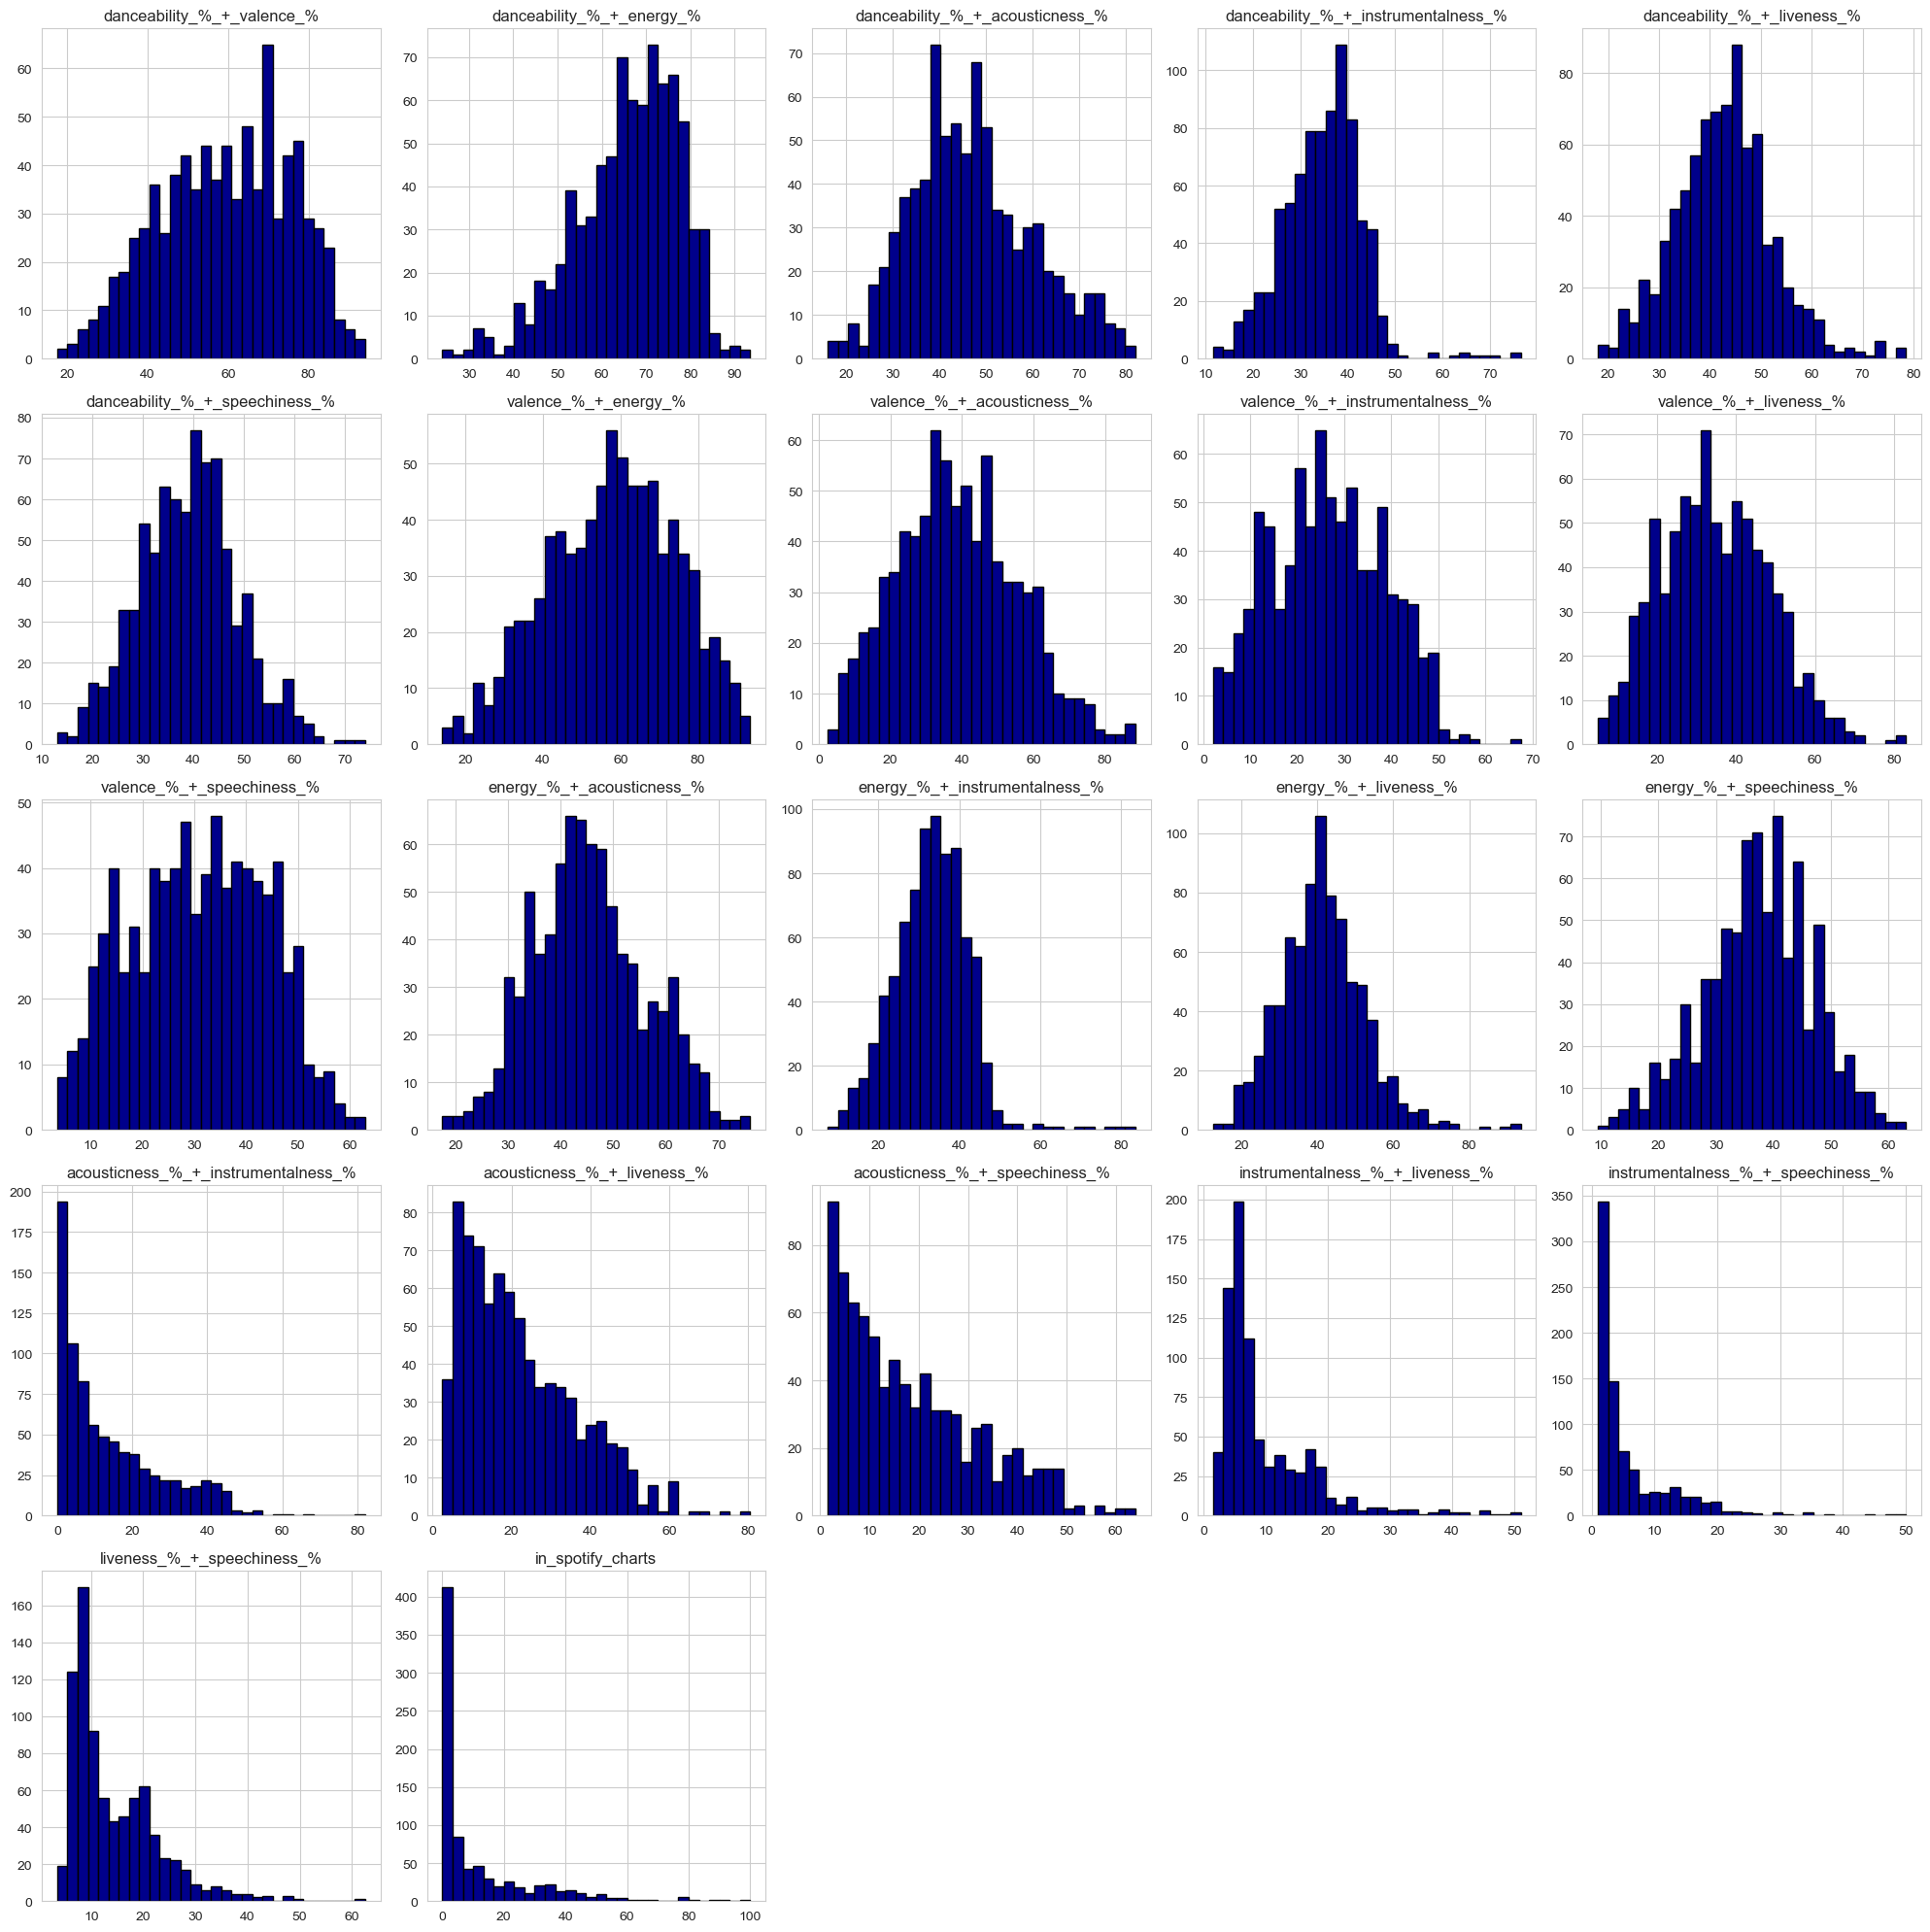

In [40]:
#Checking Distrubtuions of the features 

sns.set_style('whitegrid') 

interactions_data.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='darkblue', edgecolor='black')
plt.tight_layout()
plt.show()


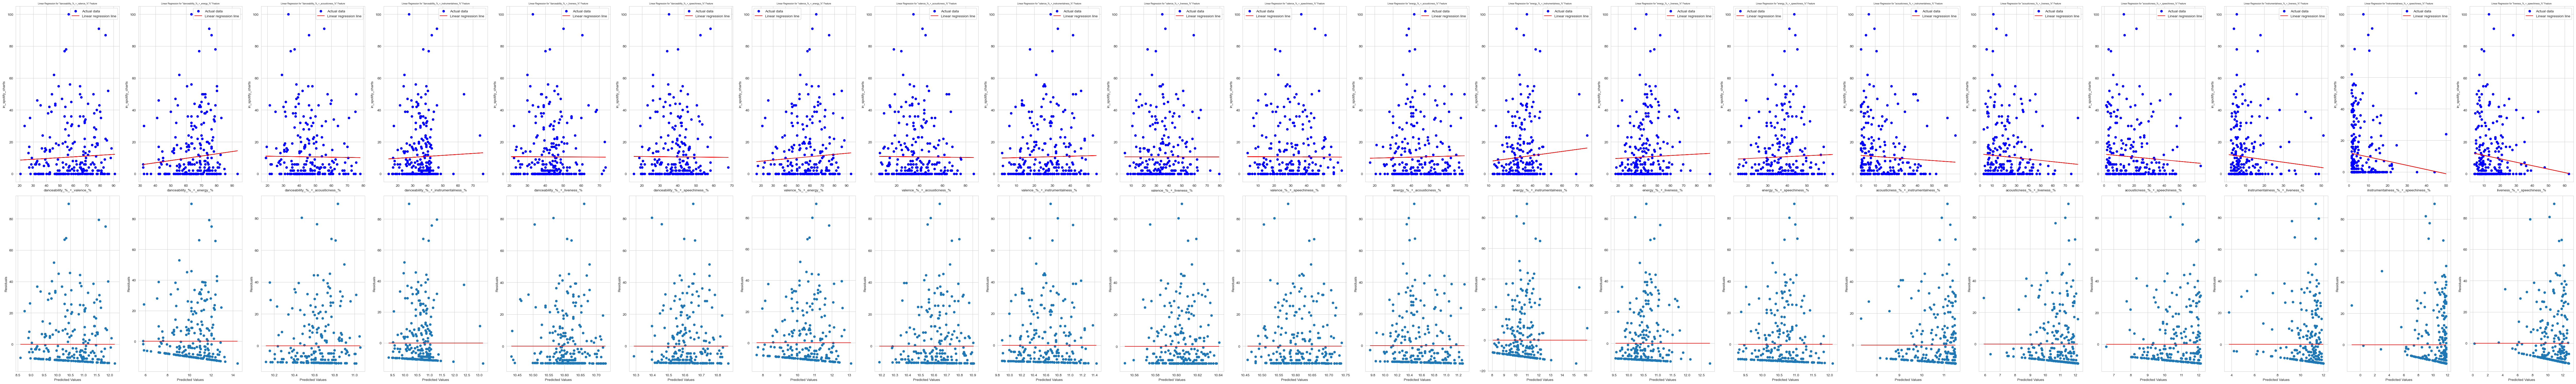

,Feature,Means,Coefficients,R2,MSE
0,danceability_%_+_valence_%,59.265683,0.051064,-0.014370,348.226457
1,danceability_%_+_energy_%,65.868389,0.140233,-0.006339,345.469464
2,danceability_%_+_acousticness_%,46.891759,-0.015928,-0.015133,348.488614
3,danceability_%_+_instrumentalness_%,34.549815,0.060908,-0.013460,347.914274
4,danceability_%_+_liveness_%,42.781673,-0.005699,-0.017629,349.345161
5,danceability_%_+_speechiness_%,38.985240,-0.011007,-0.017249,349.214822
6,valence_%_+_energy_%,57.719557,0.071049,-0.010712,346.970848
7,valence_%_+_acousticness_%,38.742927,-0.008862,-0.016191,348.851810
8,valence_%_+_instrumentalness_%,26.400984,0.029585,-0.015083,348.471361
9,valence_%_+_liveness_%,34.632841,-0.001203,-0.017376,349.258317


In [41]:
#Perfroming Linear Regression and ploting on New features   






means = [] 
coef = []
mse = [] 
r2 = []

#To test features success in range of percentages 
pred_results_eng = [] 

percentage_importances = [(0,20),(20,40),(40,60),(60,80),(80,100)]
average_percentage = [(low + high)/2 for low, high in percentage_importances] 


fig, axes = plt.subplots(2, 21, figsize=(100, 15 ))
# Loop through each column in columns 18 to 24
for i, column in enumerate(features_eng):
    # Features
    X_feature = interactions_data[[column]] 
  
    
    # Data Split
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.3, random_state=13)
    
    # Train a linear regression model
    model_feature = LinearRegression()
    model_feature.fit(X_train_feature, y_train_feature) 
    
    
    # Predict the target variable for the testing data
    y_pred_feature = model_feature.predict(X_test_feature) 

    mse_val = mean_squared_error(y_test_feature, y_pred_feature) 
    re_val = r2_score(y_test_feature, y_pred_feature) 

    mse.append(mse_val) 
    r2.append(re_val)
    
    for j, percentage in enumerate(average_percentage):
        average_percentage_df = pd.DataFrame({column: [percentage]})
        prediction = model_feature.predict(average_percentage_df)
        pred_results_eng.append({
        'Feature': column,
        'Percentage Range': f"{percentage_importances[j][0]}-{percentage_importances[j][1]}",
        'Predicted Success': prediction[0]
    })
    
    
    
    # Linear regresion and data plots
    axes[0,i].scatter(X_test_feature, y_test_feature, color='blue', label='Actual data')
    axes[0,i].plot(X_test_feature, y_pred_feature, color='red', label='Linear regression line')
    axes[0,i].set_xlabel(column)
    axes[0,i].set_ylabel('in_spotify_charts')
    axes[0,i].set_title(f'Linear Regression for "{column}" Feature', fontsize = 6)
    axes[0,i].legend() 
    #Residual Plots 
    residuals = y_test_feature - y_pred_feature 
    axes[1,i].scatter(y_pred_feature,residuals) 
    axes[1, i].hlines(y=0, xmin=y_pred_feature.min(), xmax=y_pred_feature.max(), colors='red') 
    axes[1,i].set_xlabel('Predicted Values') 
    axes[1,i].set_ylabel('Residuals')  
    
    #Coeffiecnts 
    coefficient = model_feature.coef_[0] 
    coef.append(coefficient)
    

    #Mean of Each Feature 
    mean = np.mean(X_feature) 
    means.append(mean)
    #MSe 
 

    
    

   

   
    

    
# Adjust subplot layout
plt.tight_layout()
plt.show() 


results_mean_coef_feature_eng = pd.DataFrame({

    'Feature': features_eng, 
    'Means': means, 
    'Coefficients': coef, 
    'R2': r2, 
    'MSE': mse
})


results_mean_coef_feature_eng



In [42]:
pred_results_eng_df = pd.DataFrame(pred_results_eng)  
pred_results_eng_df = pred_results_eng_df[(~pred_results_eng_df['Feature'].str.contains('instrumentalness_%')) & (~pred_results_eng_df['Feature'].str.contains('liveness_%')) & (~pred_results_eng_df['Feature'].str.contains('speechiness_%'))]

lowest_10 = pred_results_eng_df.nsmallest(10, 'Predicted Success') 

lowest_10.to_excel('Feature_eng_success.xlsx')
lowest_10

,Feature,Percentage Range,Predicted Success
5,danceability_%_+_energy_%,0-20,2.701873
6,danceability_%_+_energy_%,20-40,5.506529
30,valence_%_+_energy_%,0-20,7.174885
0,danceability_%_+_valence_%,0-20,8.060231
7,danceability_%_+_energy_%,40-60,8.311184
31,valence_%_+_energy_%,20-40,8.595856
1,danceability_%_+_valence_%,20-40,9.081502
55,energy_%_+_acousticness_%,0-20,9.532472
14,danceability_%_+_acousticness_%,80-100,9.925095
32,valence_%_+_energy_%,40-60,10.016827


In [43]:
#Other Machine Learning Algorithm Results and Importance Features


X = interactions_data[features_eng]  


# Split the full dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# Train the models on the full set of features
model_dt = DecisionTreeRegressor(random_state=13, max_depth=3)
model_rf = RandomForestRegressor(random_state=13, max_depth=3)
model_gb = GradientBoostingRegressor(random_state=13, max_depth=3)
model_lin = LinearRegression()

# Fit the models
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_lin.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_lin = model_lin.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Get feature importances
feature_importances_dt = model_dt.feature_importances_
feature_importances_rf = model_rf.feature_importances_
feature_importances_gb = model_gb.feature_importances_
feature_importances_lin = model_lin.coef_




In [44]:
# DataFrame for feature importances
feature_names = features_eng  


feature_importances_dict = {
    'Feature': feature_names,
    'Importance (Decision Tree)': feature_importances_dt,
    'Importance (Random Forest)': feature_importances_rf,
    'Importance (Gradient Boosting)': feature_importances_gb, 
    'Linear Regressian Coef': feature_importances_lin
}


coef_sum = sum(abs(feature_importances_lin))
normalized_coefs = [abs(coef) / coef_sum for coef in feature_importances_lin]
feature_importances_dict['Importance (Linear Regression)'] = normalized_coefs

results_importances_feature_eng = pd.DataFrame(feature_importances_dict)



results_importances_feature_eng







,Feature,Importance (Decision Tree),Importance (Random Forest),Importance (Gradient Boosting),Linear Regressian Coef,Importance (Linear Regression)
0,danceability_%_+_valence_%,0.246664,0.058380,0.060125,3.457175e+12,0.017970
1,danceability_%_+_energy_%,0.000000,0.038146,0.066133,-4.041735e+13,0.210090
2,danceability_%_+_acousticness_%,0.011308,0.030175,0.033464,7.030607e+12,0.036545
3,danceability_%_+_instrumentalness_%,0.000000,0.026233,0.042479,-1.290344e+12,0.006707
4,danceability_%_+_liveness_%,0.000000,0.024751,0.042946,2.821170e+13,0.146645
5,danceability_%_+_speechiness_%,0.000000,0.020162,0.031349,3.008209e+12,0.015637
6,valence_%_+_energy_%,0.262447,0.163745,0.085684,1.191819e+13,0.061951
7,valence_%_+_acousticness_%,0.000000,0.020322,0.037960,2.045912e+12,0.010635
8,valence_%_+_instrumentalness_%,0.000000,0.058617,0.058480,-7.917706e+12,0.041156
9,valence_%_+_liveness_%,0.000000,0.044370,0.043551,-1.708861e+13,0.088827


In [45]:
results_metrics_feature_eng= pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'MSE': [mse_dt, mse_rf, mse_gb, mse_lin],
    'R2 Score': [r2_dt, r2_rf, r2_gb, r2_lin]
}) 

results_metrics_feature_eng

,Model,MSE,R2 Score
0,Decision Tree,330.274432,-0.052529
1,Random Forest,312.391909,0.004459
2,Gradient Boosting,353.278916,-0.125841
3,Linear Regression,310.889458,0.009248


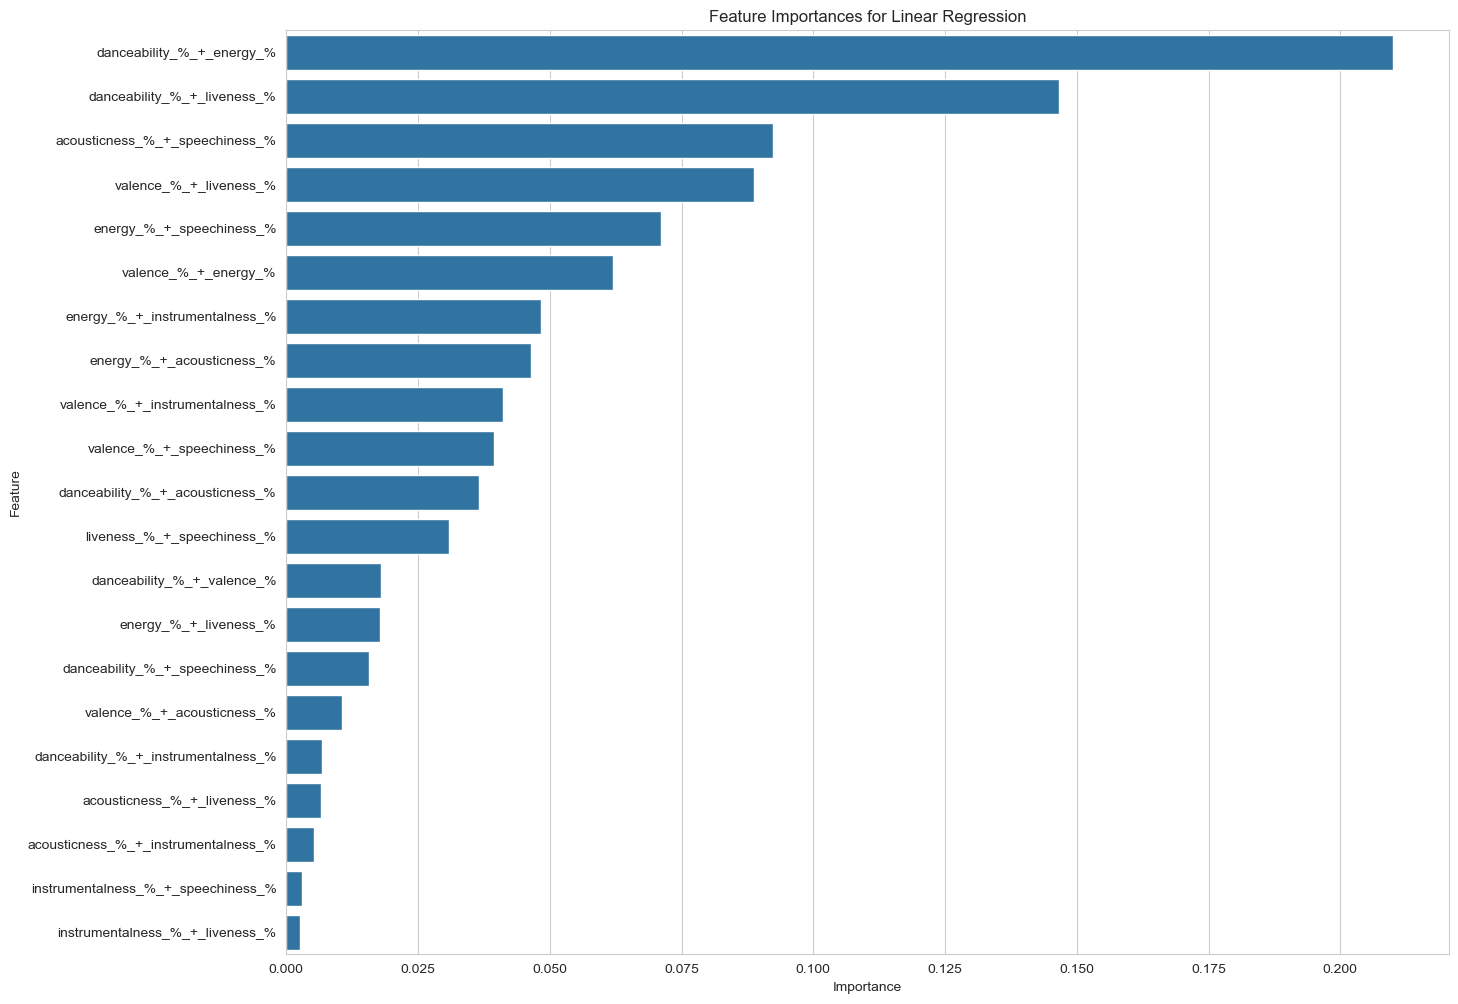

In [90]:
#Visualization of Random Forest and Linear Regression Importance 
Feature_eng_lin = pd.DataFrame({'Feature':features_eng, 'Importance':normalized_coefs} ).sort_values(by = 'Importance', ascending= False)  
Feature_eng_rf = pd.DataFrame({'Feature':features_eng, 'Importance':feature_importances_rf} ).sort_values(by = 'Importance', ascending= False)   

fig, axes = plt.subplots(1,1,figsize=(15, 12 )) 
axes.set_title('Feature Importances for Linear Regression')
sns.barplot(x = 'Importance', y = 'Feature', data = Feature_eng_lin)



plt.show()




In [74]:
# Random Samples for test Data
features_eng_test = ['danceability_%_+_valence_%',
 'danceability_%_+_energy_%',
 'danceability_%_+_acousticness_%',
 'danceability_%_+_instrumentalness_%',
 'danceability_%_+_liveness_%',
 'danceability_%_+_speechiness_%',
 'valence_%_+_energy_%',
 'valence_%_+_acousticness_%',
 'valence_%_+_instrumentalness_%',
 'valence_%_+_liveness_%',
 'valence_%_+_speechiness_%',
 'energy_%_+_acousticness_%',
 'energy_%_+_instrumentalness_%',
 'energy_%_+_liveness_%',
 'energy_%_+_speechiness_%',
 'acousticness_%_+_instrumentalness_%',
 'acousticness_%_+_liveness_%',
 'acousticness_%_+_speechiness_%',
 'instrumentalness_%_+_liveness_%',
 'instrumentalness_%_+_speechiness_%',
 'liveness_%_+_speechiness_%']

# Generating a sample dataset with random values between 0 to 150
sample_size = 150  
test_data = pd.DataFrame(np.random.randint(0, 101, size=(sample_size, len(features_eng_test))), columns=features_eng_test)
test_data.head()

,danceability_%_+_valence_%,danceability_%_+_energy_%,danceability_%_+_acousticness_%,danceability_%_+_instrumentalness_%,danceability_%_+_liveness_%,danceability_%_+_speechiness_%,valence_%_+_energy_%,valence_%_+_acousticness_%,valence_%_+_instrumentalness_%,valence_%_+_liveness_%,...,energy_%_+_acousticness_%,energy_%_+_instrumentalness_%,energy_%_+_liveness_%,energy_%_+_speechiness_%,acousticness_%_+_instrumentalness_%,acousticness_%_+_liveness_%,acousticness_%_+_speechiness_%,instrumentalness_%_+_liveness_%,instrumentalness_%_+_speechiness_%,liveness_%_+_speechiness_%
0,23,30,42,71,82,1,9,68,15,54,...,39,41,6,96,7,15,27,69,33,17
1,16,96,7,15,13,99,72,10,97,76,...,6,51,17,71,100,90,83,5,23,69
2,62,26,72,92,23,97,74,61,54,5,...,96,79,38,42,54,92,65,33,38,97
3,12,55,5,23,7,60,82,74,74,28,...,12,55,69,88,63,67,53,25,73,12
4,8,79,65,40,5,91,17,85,88,65,...,71,51,51,90,92,9,92,0,67,13


In [85]:
#Testing the models
predictions_eng_rf = model_rf.predict(test_data) 
predictions_eng_rf = pd.DataFrame(predictions_eng_rf) 

predictions_eng_lin = model_lin.predict(test_data) 
predictions_eng_lin = pd.DataFrame(predictions_eng_lin)  

predictions_eng_dt = model_lin.predict(test_data) 
predictions_eng_dt = pd.DataFrame(predictions_eng_dt)  

predictions_eng_gb = model_lin.predict(test_data) 
predictions_eng_gb = pd.DataFrame(predictions_eng_gb) 



best_10_lin = predictions_eng_lin.sort_values(by = 0).nsmallest(10,0) 
best_10_rf = predictions_eng_rf.sort_values(by = 0).nsmallest(10,0)  
best_10_dt = predictions_eng_dt.sort_values(by = 0).nsmallest(10,0)  
best_10_gb = predictions_eng_gb.sort_values(by = 0).nsmallest(10,0)  


best_10_rf

,0
117,5.929986
45,6.213506
16,6.799511
137,7.211167
128,7.679121
57,7.688120
47,8.417286
76,8.538332
92,8.549394
35,8.579070


In [102]:
best_10_rf = best_10_rf.rename(columns = {0: 'Predicted Success'}) 
best_10_rf.to_excel('Predicted Success Results.xlsx')

In [100]:
list_most_success = best_10_rf.index.to_list() 
best_results_rf_df = test_data.iloc[list_most_success] 
best_results_rf_df.to_excel('List of the most Successfull test for rf.xlsx')

In [88]:
best_10_lin

,0
1,-4.448495e+15
126,-4.309508e+15
130,-3.903059e+15
56,-3.340510e+15
127,-3.291809e+15
93,-3.291599e+15
30,-3.145627e+15
117,-3.112954e+15
43,-2.960933e+15
38,-2.852850e+15


In [47]:

with pd.ExcelWriter('combined_worksheets_feature_eng.xlsx') as writer: 
    results_mean_coef_feature_eng.to_excel(writer, sheet_name ='results_mean_coef_feature_eng') 
    results_importances_feature_eng.to_excel(writer, sheet_name ='results_importances_eng') 
    results_metrics_feature_eng.to_excel(writer, sheet_name ='results_metrics_feature_eng') 
    interactions_data.to_excel(writer, sheet_name = 'interactions_data') 
     

